In [1]:
# Import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

## Load and Prepare Dataset

In [2]:
# Variable to hold MNIST dataset 
mnist = tf.keras.datasets.mnist 

In [3]:
# Load the dataset into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [4]:
# Normalize image pixel value from [0, 255] to [0, 1]; split into train, validation, and test sets
x_train, x_test = x_train / 255.0, x_test / 255.0 

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(
	x_train, y_train, test_size = 1/6, random_state=42)

In [5]:
# Check each array shape
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_val.shape =', x_val.shape)
print('y_val.shape =', y_val.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (50000, 28, 28, 1)
y_train.shape = (50000,)
x_val.shape = (10000, 28, 28, 1)
y_val.shape = (10000,)
x_test.shape = (10000, 28, 28, 1)
y_test.shape = (10000,)


## Build the Models

In [6]:
# Building the Linear Model (0 Dense Layer)
lm = tf.keras.models.Sequential() 
# Add the Flatten Layer
lm.add(tf.keras.layers.Flatten()) 

# Add the output layer
lm.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
lm.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


2023-01-17 18:01:25.888919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Building the NN Model (1 Dense Layers)
nn = tf.keras.models.Sequential() 
# Add the Flatten Layer
nn.add(tf.keras.layers.Flatten()) 

# Add 1 hidden neuron Dense layer
nn.add(tf.keras.layers.Dense(units=400, activation="relu")) 

# Add the output layer
nn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
nn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [8]:
# Building the DNN Model (2 Dense Layers)
dnn = tf.keras.models.Sequential() 
# Add the Flatten Layer
dnn.add(tf.keras.layers.Flatten()) 

# Add 2 hidden neuron Dense layers
dnn.add(tf.keras.layers.Dense(units=400, activation="relu")) 
dnn.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Add the output layer
dnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
dnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [9]:
# Building the DNN Model with a Dropout Layer (2 Dense Layers)
dnnd = tf.keras.models.Sequential() 
# Add the Flatten Layer
dnnd.add(tf.keras.layers.Flatten()) 

# Add 2 hidden neuron Dense layers
dnnd.add(tf.keras.layers.Dense(units=400, activation="relu")) 
dnnd.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Add a dropout layer
dnnd.add(tf.keras.layers.Dropout(0.25))
# Add the output layer
dnnd.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
dnnd.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [10]:
# Building a CNN model (1 Dense Layer)
cnn = tf.keras.models.Sequential() 

# Add the 1st Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# Add the 2nd Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add the Flatten Layer
cnn.add(tf.keras.layers.Flatten())

# Add 1 hidden neuron Dense Layer
cnn.add(tf.keras.layers.Dense(units=400, activation="relu"))

# Add a Dropout Layer
cnn.add(tf.keras.layers.Dropout(0.25))
# Add the Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [11]:
# Building a Deep CNN model (1 Dense Layer)
dcnn = tf.keras.models.Sequential() 

# Add the 1st Deep Convolutional Layer
dcnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))
dcnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# Add the Dropout Layer
dcnn.add(tf.keras.layers.Dropout(0.25))

# Add the 2nd Deep Convolutional Layer
dcnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                  activation ='relu'))
dcnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# Add the Flatten Layer
dcnn.add(tf.keras.layers.Flatten())

# Add 1 Dense Layer
dcnn.add(tf.keras.layers.Dense(units=400, activation="relu"))
# Add a Dropout Layer
dcnn.add(tf.keras.layers.Dropout(0.25))

# Add the Output Layer
dcnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Compile the model
dcnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


## Train the Models

In [12]:
# Train the models
epochs = 20
batch_size = 32

print("Model: Linear Model (LM) ----------------------------------------------------------------------------------")
lm_history = lm.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Neural Network Model (NN) --------------------------------------------------------------------------")
nn_history = nn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Deep Neural Network Model (DNN) --------------------------------------------------------------------")
dnn_history = dnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Deep Neural Network Model with a Dropout Layer (DNND) ----------------------------------------------")
dnnd_history = dnnd.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)



print("Model: Convolutional Neural Network Model (CNN) -----------------------------------------------------------")
cnn_history = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)

print("Model: Deep Convolutional Neural Network Model (DCNN) -----------------------------------------------------")
dcnn_history = dcnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=2)


Model: Linear Model (LM) ----------------------------------------------------------------------------------
Epoch 1/20
1563/1563 - 2s - loss: 0.4962 - accuracy: 0.8717 - val_loss: 0.3272 - val_accuracy: 0.9115 - 2s/epoch - 1ms/step
Epoch 2/20
1563/1563 - 2s - loss: 0.3133 - accuracy: 0.9127 - val_loss: 0.2950 - val_accuracy: 0.9169 - 2s/epoch - 1ms/step
Epoch 3/20
1563/1563 - 2s - loss: 0.2902 - accuracy: 0.9190 - val_loss: 0.2833 - val_accuracy: 0.9195 - 2s/epoch - 1ms/step
Epoch 4/20
1563/1563 - 2s - loss: 0.2786 - accuracy: 0.9226 - val_loss: 0.2770 - val_accuracy: 0.9222 - 2s/epoch - 1ms/step
Epoch 5/20
1563/1563 - 2s - loss: 0.2717 - accuracy: 0.9247 - val_loss: 0.2734 - val_accuracy: 0.9219 - 2s/epoch - 1ms/step
Epoch 6/20
1563/1563 - 2s - loss: 0.2658 - accuracy: 0.9271 - val_loss: 0.2718 - val_accuracy: 0.9215 - 2s/epoch - 1ms/step
Epoch 7/20
1563/1563 - 2s - loss: 0.2616 - accuracy: 0.9274 - val_loss: 0.2721 - val_accuracy: 0.9235 - 2s/epoch - 1ms/step
Epoch 8/20
1563/1563 - 2

Epoch 4/20
1563/1563 - 4s - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.0930 - val_accuracy: 0.9721 - 4s/epoch - 2ms/step
Epoch 5/20
1563/1563 - 4s - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0826 - val_accuracy: 0.9779 - 4s/epoch - 2ms/step
Epoch 6/20
1563/1563 - 4s - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.1098 - val_accuracy: 0.9725 - 4s/epoch - 2ms/step
Epoch 7/20
1563/1563 - 4s - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0812 - val_accuracy: 0.9793 - 4s/epoch - 2ms/step
Epoch 8/20
1563/1563 - 4s - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0898 - val_accuracy: 0.9782 - 4s/epoch - 2ms/step
Epoch 9/20
1563/1563 - 4s - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0855 - val_accuracy: 0.9807 - 4s/epoch - 2ms/step
Epoch 10/20
1563/1563 - 4s - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.1031 - val_accuracy: 0.9764 - 4s/epoch - 2ms/step
Epoch 11/20
1563/1563 - 4s - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0974 - val_accuracy: 0.9797 - 4s/epoch - 2ms/step
Epoch 

## Plot Accuracies for the Models

313/313 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9808


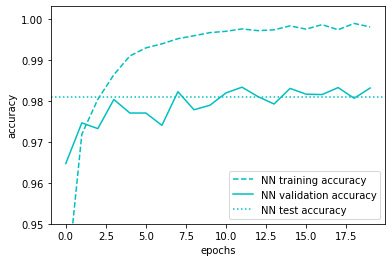

In [13]:
# Plot training and validation accuracies for the models
nn_test_loss, nn_test_acc = nn.evaluate(x_test, y_test)

plt.plot(nn_history.history["accuracy"], "c--",label="NN training accuracy")
plt.plot(nn_history.history["val_accuracy"], "c-",label="NN validation accuracy")
plt.axhline(nn_test_acc,color="c", linestyle=":", label="NN test accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.003)
plt.legend()

313/313 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9789


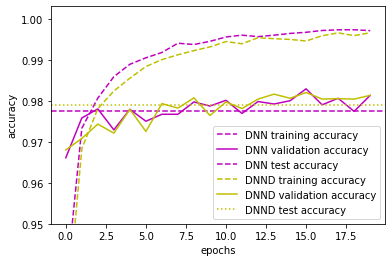

In [14]:
# Plot training and validation accuracies for the models
dnn_test_loss, dnn_test_acc = dnn.evaluate(x_test, y_test)
dnnd_test_loss, dnnd_test_acc = dnnd.evaluate(x_test, y_test)

plt.plot(dnn_history.history["accuracy"], "m--",label="DNN training accuracy")
plt.plot(dnn_history.history["val_accuracy"], "m-",label="DNN validation accuracy")
plt.axhline(dnn_test_acc,color="m", linestyle="--", label="DNN test accuracy")

plt.plot(dnnd_history.history["accuracy"], "y--",label="DNND training accuracy")
plt.plot(dnnd_history.history["val_accuracy"], "y-",label="DNND validation accuracy")
plt.axhline(dnnd_test_acc,color="y", linestyle=":", label="DNND test accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.003)
plt.legend()

313/313 [==============================] - 7s 24ms/step - loss: 0.0476 - accuracy: 0.9917


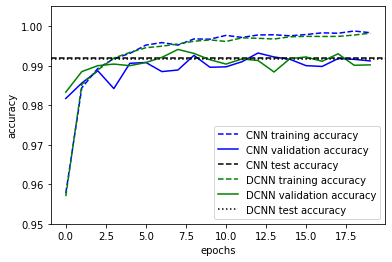

In [15]:
# Plot training and validation accuracies for the models
cnn_test_loss, cnn_test_acc = cnn.evaluate(x_test, y_test)
dcnn_test_loss, dcnn_test_acc = dcnn.evaluate(x_test, y_test)

plt.plot(cnn_history.history["accuracy"], "b--",label="CNN training accuracy")
plt.plot(cnn_history.history["val_accuracy"], "b-",label="CNN validation accuracy")
plt.axhline(cnn_test_acc,color="k", linestyle="--", label="CNN test accuracy")

plt.plot(dcnn_history.history["accuracy"], "g--",label="DCNN training accuracy")
plt.plot(dcnn_history.history["val_accuracy"], "g-",label="DCNN validation accuracy")
plt.axhline(dcnn_test_acc,color="k", linestyle=":", label="DCNN test accuracy")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.95, 1.005)
plt.legend()

## Plot Accuracy and Loss for each Model

In [16]:
def metrics_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric])
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

Model: Linear Model (LM)


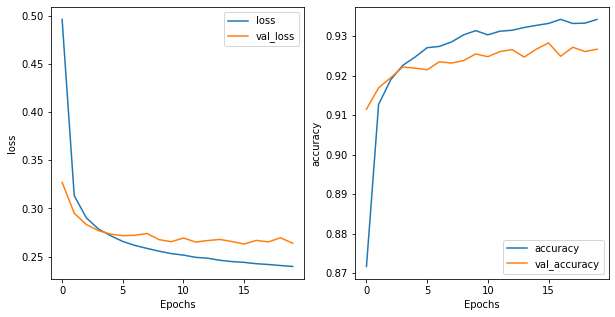

In [17]:
print("Model: Linear Model (LM)")
metrics_plot(['loss', 'accuracy'], lm_history)

Model: Neural Network Model (NN)


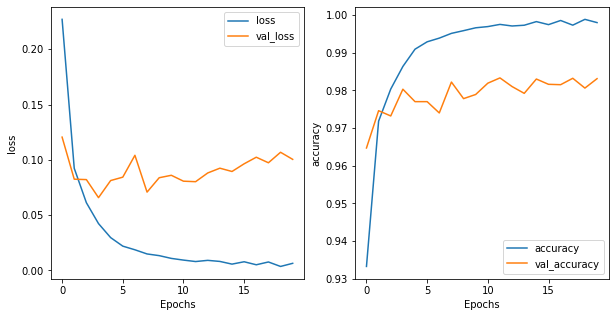

In [18]:
print("Model: Neural Network Model (NN)")
metrics_plot(['loss', 'accuracy'], nn_history)

Model: Deep Neural Network Model (DNN)


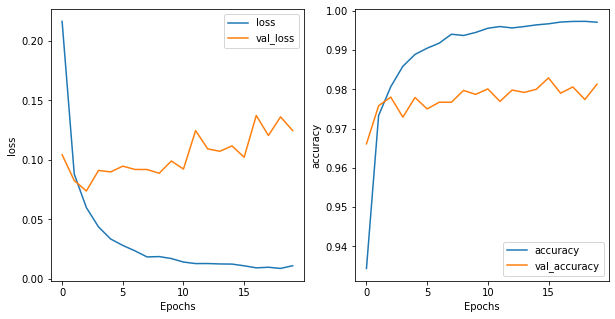

In [19]:
print("Model: Deep Neural Network Model (DNN)")
metrics_plot(['loss', 'accuracy'], dnn_history)

Model: Deep Neural Network Model with a Dropout Layer (DNND)


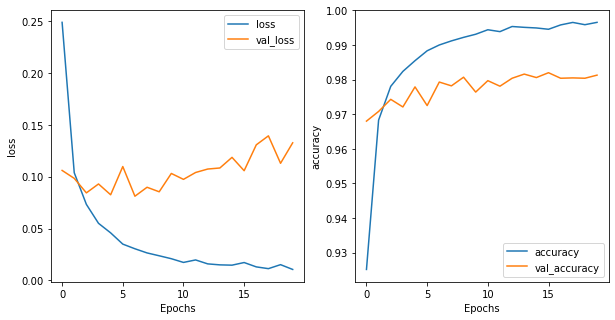

In [20]:
print("Model: Deep Neural Network Model with a Dropout Layer (DNND)")
metrics_plot(['loss', 'accuracy'], dnnd_history)

Model: Convolutional Neural Network Model (CNN)


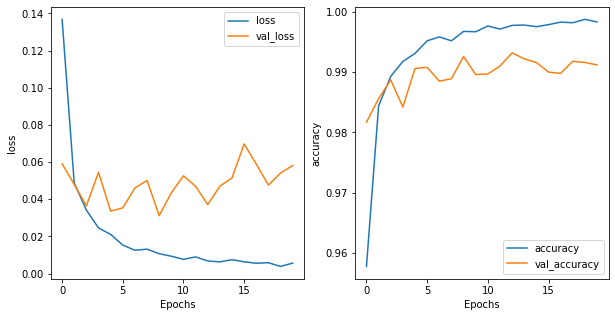

In [21]:
print("Model: Convolutional Neural Network Model (CNN)")
metrics_plot(['loss', 'accuracy'], cnn_history)

Model: Deep Convolutional Neural Network Model (DCNN)


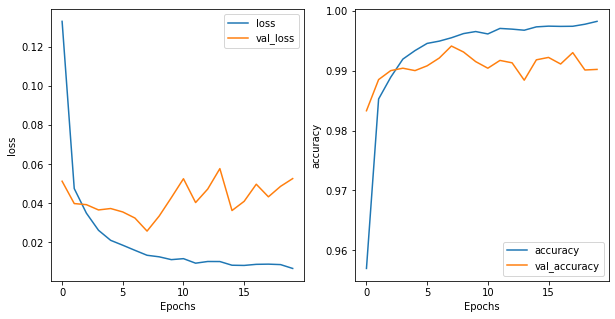

In [22]:
print("Model: Deep Convolutional Neural Network Model (DCNN)")
metrics_plot(['loss', 'accuracy'], dcnn_history)